In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Add Dataset

This dataset is from Kaggle (https://www.kaggle.com/datasets/surajjha101/cuisine-rating). 
The first step is to load the dataset into this notebook and check whether there is #N/A value or not

In [2]:
dataset = pd.read_csv('Cuisine_rating.csv')
dataset

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


#### Check n/a

In [3]:
print(dataset.isna().sum())

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64


#### Check data shape

In [4]:
dataset.shape

(200, 15)

#### Check datatype

In [5]:
dataset.dtypes

User ID             int64
Area code           int64
Location           object
Gender             object
YOB                 int64
Marital Status     object
Activity           object
Budget              int64
Cuisines           object
Alcohol            object
Smoker             object
Food Rating         int64
Service Rating      int64
Overall Rating    float64
Often A S          object
dtype: object

##### Change data type

In [6]:
dataset = dataset.convert_dtypes()
dataset.dtypes

User ID             Int64
Area code           Int64
Location           string
Gender             string
YOB                 Int64
Marital Status     string
Activity           string
Budget              Int64
Cuisines           string
Alcohol            string
Smoker             string
Food Rating         Int64
Service Rating      Int64
Overall Rating    Float64
Often A S          string
dtype: object

### Exploratory Data Analysis (EDA)

#### Location

St. George,NY         46
Upper East Side,NY    30
Riverdale,NY          28
Central Park,NY       24
China Town, NY        22
Market City, NY       20
Upper West Side,NY    18
Central Park,ny        8
Market City, MY        2
Cedar Hill, NY         2
Name: Location, dtype: Int64


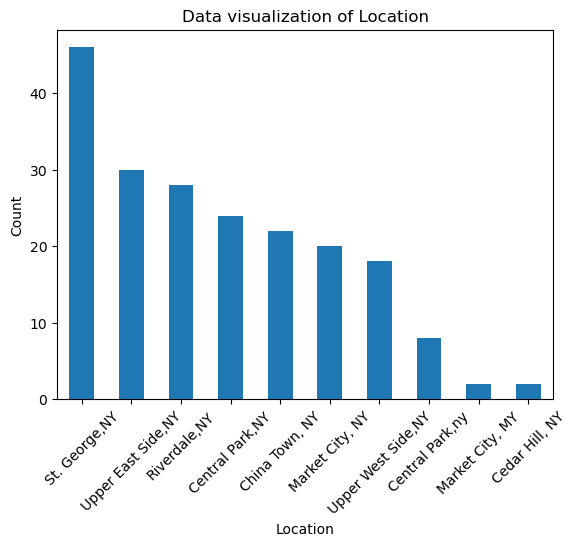

In [7]:
loc = dataset['Location'].value_counts()
print(loc)

# visualization
loc.plot(x='location', y='count', kind='bar')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Data visualization of Location')

plt.show()

From the visualization above, St.George in New York City has the most restaurants while Market City and Cedar Hill has the least restaurants, only 2 restaurants according to the data.

#### Gender

Male      118
Female     82
Name: Gender, dtype: Int64


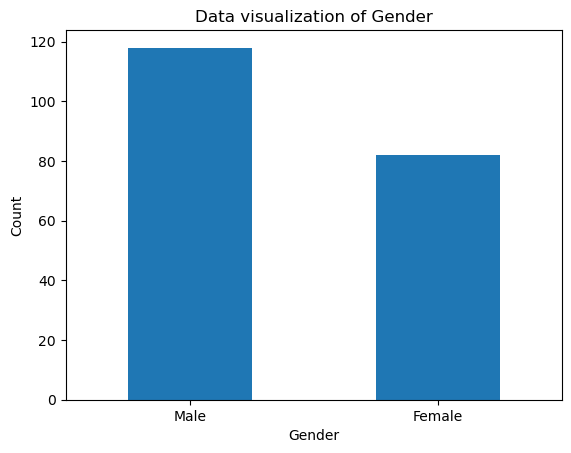

In [8]:
gender = dataset['Gender'].value_counts()
print(gender)

# visualization
gender.plot(x='Gender', y='Count', kind='bar')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Data visualization of Gender')

plt.show()

From the visualization above, we can say that men is more often to go to a restaurant than women with the ratio of 59:41 or we could say that 59% of the people who come to the restaurant are men.

#### Cuisine

Japanese    36
Filipino    34
French      34
Indian      32
Chinese     24
Seafood     22
Italian     18
Name: Cuisines, dtype: Int64


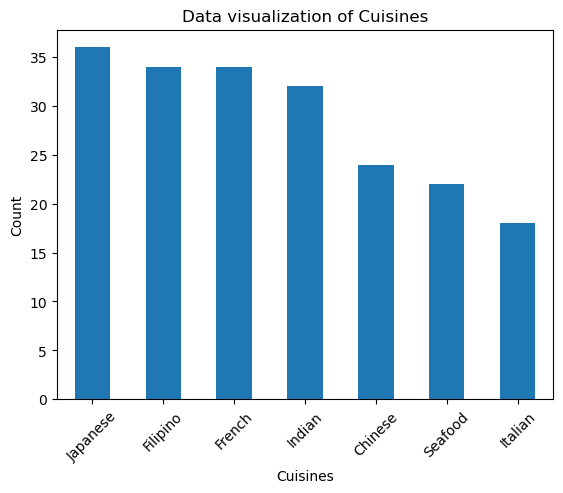

In [9]:
cuisine = dataset['Cuisines'].value_counts()
print(cuisine)

# visualization
cuisine.plot(x='Cuisines', y='Count', kind='bar')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.title('Data visualization of Cuisines')

plt.show()

For the cuisines itself, Japanese has the most visit compared to the other cuisines and Italian has the least visit compared

#### Overall Rating

3.5    35
3.0    34
2.5    32
5.0    29
4.0    26
2.0    21
1.5    11
4.5     6
1.0     6
Name: Overall Rating, dtype: Int64


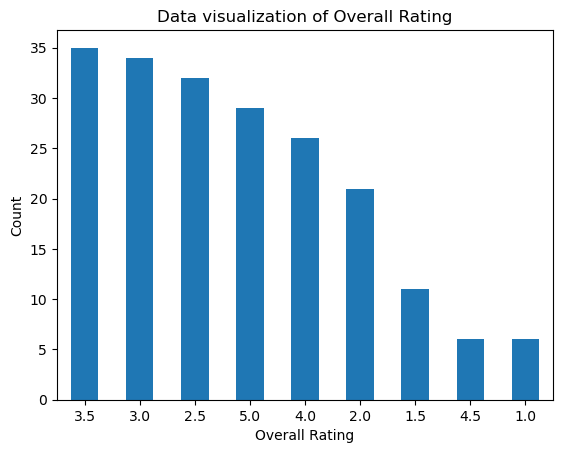

In [10]:
rating = dataset['Overall Rating'].value_counts()
print(rating)

# visualization
rating.plot(x='Overall Rating', y='Count', kind='bar')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.title('Data visualization of Overall Rating')

plt.show()

#### Let's see what is the cuisine they sell most in St. George

Location       Cuisines
St. George,NY  Filipino    12
               Japanese    10
               French       8
               Indian       8
               Chinese      4
               Italian      4
dtype: int64


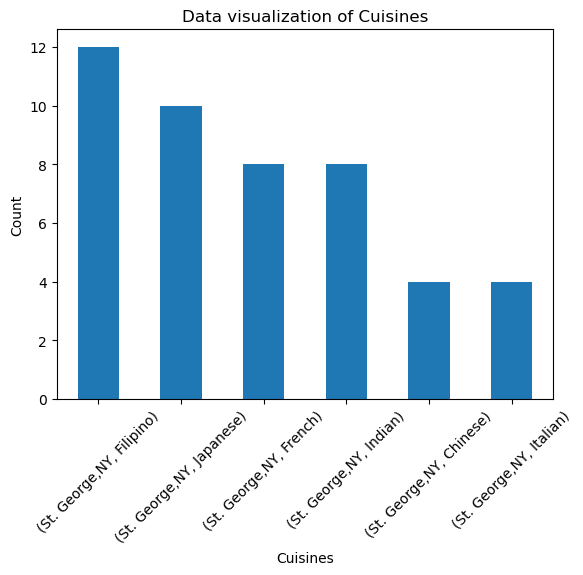

In [11]:
cui_george = dataset[dataset['Location']=="St. George,NY"].groupby(['Location','Cuisines']).size().sort_values(ascending = False)
print(cui_george)

# visualization
cui_george.plot(x='Cuisines', y='Count', kind='bar')
x_data = ['Filipino','Japanese','French','Indian','Chinese','Italian']

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.title('Data visualization of Cuisines')

plt.show()

How many 

Location       Activity    
St. George,NY  Student         24
               Professional    22
dtype: int64


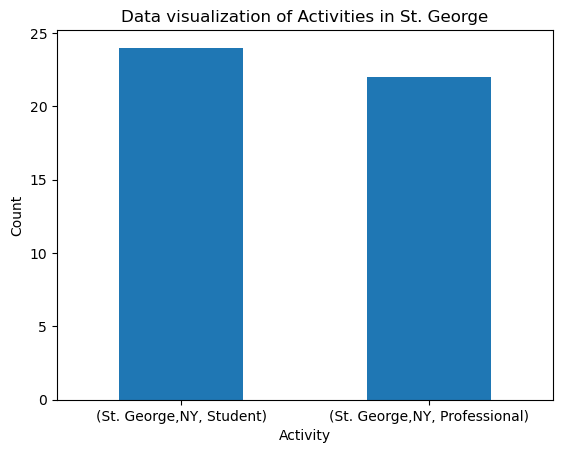

In [12]:
act_george = dataset[dataset['Location']=="St. George,NY"].groupby(['Location','Activity']).size().sort_values(ascending = False)
print(act_george)

# visualization
act_george.plot(x='Cuisines', y='Count', kind='bar')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Data visualization of Activities in St. George')

plt.show()

Location       Gender  Activity    
St. George,NY  Male    Student         16
                       Professional    12
               Female  Professional    10
                       Student          8
dtype: int64


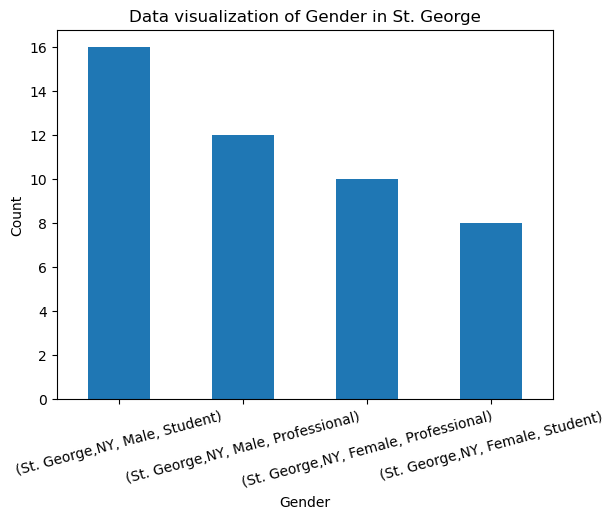

In [13]:
gender_george = dataset[dataset['Location']=="St. George,NY"].groupby(['Location','Gender','Activity']).size().sort_values(ascending = False)
print(gender_george)

# visualization
gender_george.plot(x='Cuisines', y='Count', kind='bar')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=15)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Data visualization of Gender in St. George')

plt.show()

We could see that from 59% of the population or we could say from 118 men there are 28 men in St. George while for women there are 18 women who lives in St. George.

#### Chinese vs Italian Cuisine in St. George

In [14]:
gender_george = dataset[dataset['Location']=="St. George,NY"].groupby(['Gender','Cuisines']).size().sort_values(ascending = False)
print(gender_george)

Gender  Cuisines
Male    Filipino    12
        Japanese     8
Female  French       6
        Indian       4
        Italian      4
Male    Indian       4
Female  Chinese      2
        Japanese     2
Male    Chinese      2
        French       2
dtype: int64


From the data above, we can see that Men likes to go to Filipino restaurants 

Cuisines  Gender  Activity    
Filipino  Male    Student         8
Japanese  Male    Student         6
Filipino  Male    Professional    4
French    Female  Professional    4
Indian    Female  Student         4
          Male    Professional    4
Chinese   Female  Professional    2
          Male    Student         2
French    Female  Student         2
          Male    Professional    2
Italian   Female  Professional    2
                  Student         2
Japanese  Female  Professional    2
          Male    Professional    2
dtype: int64


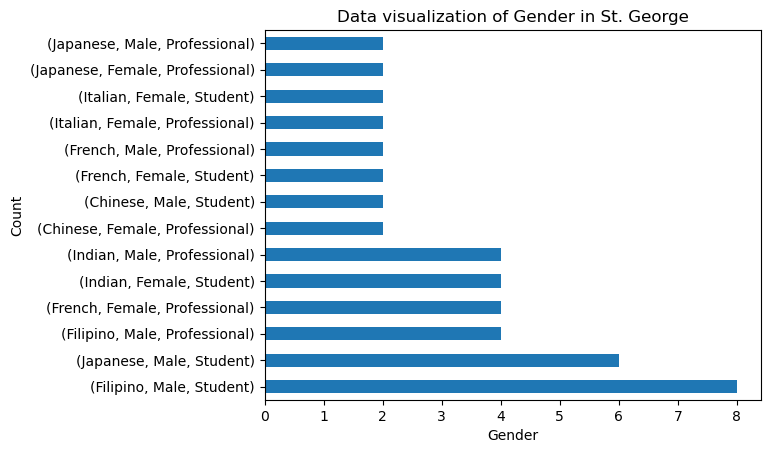

In [15]:
gender_george = dataset[dataset['Location']=="St. George,NY"].groupby(['Cuisines','Gender','Activity']).size().sort_values(ascending = False)
print(gender_george)

# visualization
gender_george.plot(x='Cuisines', y='Count', kind='barh')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Data visualization of Gender in St. George')

plt.show()

From the visualization above, we can recognize that from those 59% of the population are men. Thus, those 59% likes to visit Filipino restaurant